An introduction to open quantum systems 
========================================

### 6.1 Qubit decoherence mechanisms: energy relaxation ($T_{1}$) and dephasing ($T_{2}$)

#### Z.K. Minev, IBM TJ Watson Research Center

#### Abstract
In this brief chapter, we promote our closed-system treatment of a quantum bit (qubit) to an open-system one. Here, you will learn the basic ideas of open-system evolution. Our focus is on unwanted, incoherent processes. These are unavoidable in a physical system and are thus necessary to understand for any practical quantum computation. A "real" qubit does not exist in isolation, but rather as a physical system embedded in an environment. Due to the unavoidable coupling with the environment (here, considered unmonitored) the qubit evolution is profoundly affected. Typically, the coupling results in two chief decoherence mechanisms that limit qubit performance: unwanted loss of energy and loss of coherence. These are characterized by the energy-relaxation lifetime ($T_{1}$) and the total dephasing time ($T_{2}$), respectively. We will explain these with a simple toy model based on the simplest possible quantum trajectory (used in the qiskit Aer simulator). We obtain the standard Linbdlad form of the master equation, which governs the evolution of the average quantum state (the density matrix). We explain how to characterize $T_{1}$ and $T_{2}$ noise. Finally, we comment on related notions such as $T_{2}^{*}$, $T_{2}^{E}$, and a hot, thermal environment. Finally, we will measure $T_{1}$ and $T_{2}$ on a real quantum device.

<hr>

#### Contents


- [6.1 Qubit decoherence mechanisms: energy relaxation ($T_{1}$) and dephasing ($T_{2}$)](#61-qubit-decoherence-mechanisms-energy-relaxation-t_1-and-dephasing-t_2)
  - Introduction
      - [Qubit and environment.](#qubit-and-environment)
      - [Environmental noise model: microscopic origin.](#environmental-noise-model-microscopic-origin)
      - [Description of just the qubit system that accounts for the coupling to the environment.](#description-of-just-the-qubit-system-that-accounts-for-the-coupling-to-the-environment)
    - [Review of preliminaries: Bloch-vector representation.](#review-of-preliminaries-bloch-vector-representation)
  - [The bit-flip quantum channel: random kicks](#the-bit-flip-quantum-channel-random-kicks)
      - [Model: to kick or not to kick](#model-to-kick-or-not-to-kick)
    - [Average state evolution](#average-state-evolution)
    - [Bloch picture](#bloch-picture)
      - [Time evolution](#time-evolution)
  - [The amplitude damping channel: energy loss$\left(T_{1}\right)$](#the-amplitude-damping-channel-energy-lossleftt_1right)
  - [Phase damping $T_{\phi}$](#phase-damping-t_phi)
  - [Both amplitude $T_{1}$ and phase damping $T_{\phi}$](#both-amplitude-t_1-and-phase-damping-t_phi)
- [ignis](#ignis)



Open quantum system evolution: a simple model
=============================================

###### Qubit and environment.

For simplicity and definitiveness of example, let us begin by restricting our attention to the simplest possible quantum system one that has two levels. A qubit [^1] cannot exist in isolation. It is part of a larger world that it is unavoidably coupled to. The coupling is an interaction between the qubit degree of freedom and the rest of the world, which we will refer to as the *environment*. Sometimes, the environment is also referred to as the *bath* or *reservoir.* As it consists of the rest of the world, we consider it large, or *macroscopic* composed of many degrees of freedom, which for all practical purposes we have no knowledge of or control over.

###### Environmental noise model: microscopic origin.

Let us begin with a semi-classical picture. If the environmental degrees of freedom are uncontrolled, we may imagine that each of them them jiggles about stochastically. However, as a degree jiggles, if it is coupled to the qubit, it effects a force on the qubit due to the system-environment coupling. The result is a stochastic force applied on the qubit that alters its states in an unknown manner. Even if the environmental degrees of freedom are very weakly coupled to the qubit, their multitude and continuous existence [^2] can lead to a signifiant alteration of the qubit dynamics. The coupling, which can serve to jiggle the qubit about stochastically, also acts in the reverse direction. Any energy (or information) stored in the system can leak out of the qubit into the environment [^3]. In summary, unavoidable coupling between our small qubit system and the *macroscopic* environment rapidly leads to loss of quantum coherence for the qubit a process known as *decoherence.*

###### Description of just the qubit system that accounts for the coupling to the environment.

Since we cannot track the environment, we will focus on a description of just the qubit system. The effect of the environment will be factored in an average sense we will discuss the density matrix $\rho$ rather than the pure state $\left|\psi\right\rangle$. We could at this stage write down a quantum description of both the system and the environment, considered as an infinite number of quantum degrees of freedom, and proceed to trace out the environment under some assumptions. This canonical approach is explicated in many textbooks, including Niselen and Chuang or Carmichael. Let us rather take a different tack. This is a slightly simpler approach that will lead to the same final result, while teaching us some new basic concepts along the way.

##### Review of preliminaries: Bloch-vector representation.

Before proceeding to look at the ensemble, average behavior that results from the interaction with the environment, let us review the description of the density matrix in terms of the Bloch vector representation. Let us briefly review the Bloch vector of a qubit. It consists of three components, denoted $x,y$, and $z$, which find values in the range bounded by -1 and +1. Each corresponds to the expectation value of a Pauli operator $(X,Y,Z)$. For example $x=\operatorname{Tr}\left(X\rho\right).$ Note that $x$ is a scalar variable, while $X$ is a quantum operator. These three components represent all informationally orthogonal directions. Together they specify the quantum state fully. For convenience, they can be grouped into a vector $\vec{r}\left(t\right)=\left(x\left(t\right),y\left(t\right),z\left(t\right)\right)$. The density matrix expressed in terms of the Bloch vector components is $$\begin{aligned}
\rho & =\frac{1}{2}\begin{pmatrix}1+z & x-iy\\
x+iy & 1-z
\end{pmatrix}\\
 & =\frac{1}{2}\left(I+xX+yY+zZ\right)\\
 & =\frac{1}{2}\left(I+\vec{r}\cdot\vec{\sigma}\right)\,,\end{aligned}$$ where in the last line, for notational convenience, we expressed the inner product between the vector of expectations $\vec{r}$ and the vector of Pauli operators $\vec{\sigma}=\left(X,Y,Z\right).$ Note that there is no global phase when discussing the density matrix. The Bloch vector length $\left|\vec{r}\right|_{2}=\sqrt{x^{2}+y^{2}+z^{2}}$ is a number between zero and one. One indicates that the state is pure, while zero indicates that the state is completely mixed. It is important to keep in mind that the ground state ($\left|g\right\rangle$) is denoted by $z=+1$, while the excited state ($\left|e\right\rangle$) is represented by $z=-1$. This may at first seem at adds with your intuition.

#### The bit-flip quantum channel: random kicks

###### Model: to kick or not to kick

Consider the following elementary model of the interaction between the qubit and the environment. Suppose that at each instant in time the environment can only perform one of two possible actions on the qubit either it does nothing ($I$) or it flips the qubit bit ($X$). Consider the case in which the environment does nothing we can think of this as the environment applying the identity gate $I$ to the qubit. This case occurs with a probability that we will denote $1-p$ [^4]. Denoting time by $t$ and the time increment by $\mathrm{d}t$, the quantum state $\rho$ at time $t+\mathrm{d}t$ (conditioned on the identity gate $I$ having been applied by the environment) is $$\rho_{I}\left(t+\mathrm{d}t\right)=I\rho\left(t\right)I\,,\qquad\mathbb{P}\left(I\right)=1-p\,,$$ where we have expressed the probability of the identity gate occurring as $\mathbb{P}\left(I\right)=1-p$. If $p=0$, then the environment always applies the identity and never performs a random action. This is the case of a closed quantum system. For all time, an initial pure state $\rho\left(0\right)=\left|\psi\right\rangle \left\langle \psi\right|$ will remain pure.

What happens in the remainder of the instances, corresponding to the probability $\mathbb{P}\left(X\right)\equiv p$? Let's say the environment randomly applies the bit-flip gate $X$ to the qubit. The resulting state at time $t+\mathrm{d}t$ is now $$\rho_{X}\left(t+\mathrm{d}t\right)=X\rho\left(t\right)X\,,\qquad\mathbb{P}\left(X\right)=p\,.$$ If the qubit was initialized in $\left|0\right\rangle \left\langle 0\right|$, it will at the next time step be found in $\left|1\right\rangle \left\langle 1\right|$ with probability $p$.

##### Average state evolution

Since we cannot keep track of the environment, we must average these various possible outcomes together to obtain the (unconditional) ensemble state $$\begin{aligned}
\rho\left(t+\mathrm{d}t\right) & =\mathbb{P}\left(I\right)\rho_{I}\left(t+\mathrm{d}t\right)+\mathbb{P}\left(X\right)\rho_{X}\left(t+\mathrm{d}t\right)\\
 & =\left(1-p\right)\rho_{I}\left(t+\mathrm{d}t\right)+p\rho_{X}\left(t+\mathrm{d}t\right)\\
 & =\left(1-p\right)\rho\left(t\right)+pX\rho\left(t\right)X\,.\end{aligned}$$ Note the interpretation of the last line in terms of a null and non-null operation weighted by some probabilities that sum to one. We will see this form repeatedly.

###### [[A bit of nomenclature]{.upright}]{.medium}

It is sometime useful to describe the environment operation on the density matrix as an operation called a *channel*. We can write it as $$\rho\left(t+\mathrm{d}t\right)=\mathcal{E}\left[\rho\left(t\right)\right]\,,$$ where the calligraphic symbol $\mathcal{E}$ denotes the channel map. Since it acts on density matrices, rather than wave-vectors, we call it, rather than an operator, a *superoperator*. Note that the channel, a map from $\rho\left(t\right)$ to $\rho\left(t+\mathrm{d}t\right)$, is linear in $\rho$.

![image](_imgs/a.png)

Technically, what we wrote down in the preceding discussion is called a Kraus decomposition of a quantum channel. The channel here is the ensemble operation of the environment on the qubit. The Kraus operators are the probability-weighted identify and bit-flip gates. Let us not dwell on the technical aspect here, we will encounter it again soon enough. Rather, let us provide a more clear picture of the action of the above map.

##### Bloch picture

In terms of the Bloch representation, see the section entitled "Review of preliminaries: Bloch-vector representation," the action of the environment is to perform either$I$ or $X$ on the qubit resulting in: $$\begin{aligned}
\mathrm{I:}\qquad & \vec{r}_{I}\left(t+\mathrm{d}t\right)=\left(x\left(t\right),y\left(t\right),z\left(t\right)\right)\,,\\
\mathrm{X:}\qquad & \vec{r}_{X}\left(t+\mathrm{d}t\right)=\left(x\left(t\right),-y\left(t\right),-z\left(t\right)\right)\,.\end{aligned}$$ The bit-flip environment randomly flips the $y$ and $z$ Bloch components. Thus, on average, $$\vec{r}\left(t+\mathrm{d}t\right)=\left(x\left(t\right),\left(1-2p\right)y\left(t\right),\left(1-2p\right)z\left(t\right)\right)\,.$$ We observe that the states along $x$ are unaffected. However, the states in the $y-z$ plane are subjected to a decay. [^5]

###### Time evolution

What happens as time goes on? In other words, as we apply the quantum map repeatedly, and eventually continuously in time. First, let us divide time into $n$ even chunks of size $\mathrm{d}t$, where $n$ is an integer; $t=n\mathrm{d}t$. The evolution of the Bloch vector becomes (this follows directly from the display equation above) $$\vec{r}\left(t\right)=\left(x\left(0\right),\left(1-2p\right)^{n}y\left(0\right),\left(1-2p\right)^{n}z\left(0\right)\right)\,.$$ Equivalently, we could have written the density matrix in terms of the channel map, $\rho\left(t\right)=\mathcal{E}^{n}\left[\rho\left(0\right)\right]$, where $\mathcal{E}^{n}$ denotes the repeated application of the channel $n$ times.

To take the continuum limit, we need to first express $p$ in terms of a time rate. Let $p=\gamma\mathrm{d}t$, where $\gamma$ is finite and is the bit-flip rate. Using the limit identity $\lim_{n\rightarrow\inf}\left(1-\frac{a}{n}\right)^{n}=e^{-n},$ one finds (try this exercise yourself) $$\vec{r}\left(t\right)=\left(x\left(0\right),e^{-2\gamma t}y\left(0\right),e^{-2\gamma t}z\left(0\right)\right)\,.$$ What does equation this mean? We observe the exponential decay [^6] of the initial information stored in the $y$ and $z$ Bloch components. The information is scrambled by the environment, until we no longer know what has happened to it. This is a type of decoherence. The decay of the $z$ component describes the loss of polarization of the qubit. The decay time of this component is called the $T_{1}$ time, i.e., in this simple model $T_{1}=\frac{2}{\gamma}$.

However, the simple bit-flip model we have examined so far is not quite the processed that is typically observed in lab. We will cover the standard $T_{1}$ energy loss process in the following section by repeating the above analysis.

#### The amplitude damping channel: energy loss$\left(T_{1}\right)$

Consider the physical case of the leakage (emission) of a photon from a qubit into the environment, and its detection by the environment. The total loss of a photon of energy of the in the qubit should annihilate the excited ground state. Thus instead of a bit-flip, in this model, the environment applies the annihilation (lowering) operator on the qubit, $$\sigma_{-}\equiv\left|0\right\rangle \left\langle 1\right|=\frac{1}{2}\left(X+iY\right)=\begin{pmatrix}0 & 1\\
0 & 0
\end{pmatrix}\,.$$ Note that this can no longer occur with fixed probability. If the atom is in the ground state, there should be no possibility for the environment to have detected a leaked photon from the excited states. Hence the probability to apply $\sigma_{-}$ should be zero. In general, the probability to annihilate the excited state ($\left|1\right\rangle$) will dictated by the excited state population, namely $p_{\mathrm{click}}=p\mathrm{Tr}\left[\left|1\right\rangle \left\langle 1\right|\rho\right]=p\mathrm{Tr}\left[\sigma_{-}^{\dagger}.\sigma_{-}\rho\right]$, where $p$ is a proportionality factor between zero and one. One can show [^7] that the correct random operations applied by the environment on the qubit for this scenario are the following two Kraus maps $$A_{0}=\begin{pmatrix}1 & 0\\
0 & \sqrt{1-p}
\end{pmatrix}\,,\qquad A_{1}=\sqrt{p}\sigma_{-}\,.$$ The probability of a click is thus succinctly expressed as $p_{\mathrm{click}}=\operatorname{Tr}\left[A_{1}^{\dagger}A_{1}\rho\right]=\frac{p}{2}\left(1-z\right)=\rho_{11}$, where $\frac{1}{2}\left(1-z\right)$ is the population of the $\left|1\right\rangle$ state, denoted $\rho_{11}$. The probability of no-click event is $p_{\mathrm{no-click}}=\operatorname{Tr}\left[A_{0}^{\dagger}A_{0}\rho\right]=1-\rho_{11}$. Combining these two weighted operators the amplitude damping ($T_{1})$ noise map is $$\mathcal{A}\left(\rho\right)=A_{0}\rho A_{0}^{\dagger}+A_{1}\rho A_{1}^{\dagger}\,,$$ which can be expressed in terms of its action on the Bloch vector components, $$\vec{r}\left(t+\mathrm{d}t\right)=\left(\sqrt{1-p}x\left(t\right),\sqrt{1-p}y\left(t\right),\left(1-p\right)z\left(t\right)+p\right)\,.$$ We leave it as an exercise to show that the repeated application of the noise map leads to $$\vec{r}\left(t+\mathrm{d}t\right)=\left(\left(1-p\right)^{n/2}x\left(t\right),\left(1-p\right)^{n/2}y\left(t\right),1+\left(1-p\right)^{n}z\left(t\right)\right)\,.$$ Using the limit results from the last section, you can show that in the continuous limit, setting $p=\frac{1}{T_{1}}\mathrm{d}t$, $$\vec{r}\left(t+\mathrm{d}t\right)=\left(e^{-t/2T_{1}}x\left(0\right),e^{-t/2T_{1}}y\left(0\right),1+e^{-t/T_{1}}z\left(0\right)\right)\,.$$ Observe the exponential decay of the population with a time constant $T_{1}$, called the energy relaxation time, to the ground state $\lim_{t\rightarrow\infty}z\left(t\right)=+1$. The coherence $x$ and $y$ Bloch components decay with a time constant $T_{2}=2T_{1}$.

#### Phase damping $T_{\phi}$

If the environment randomly flips the phase of the qubit, the Kraus operators would be [^8]

$$A_{0}=\sqrt{1-p}I\,,\qquad A_{1}=\sqrt{p}Z\,,$$ in which case, we leave it as an exercise to the reader, one finds $$\vec{r}\left(t+\mathrm{d}t\right)=\left(e^{-t/T_{\phi}}x\left(0\right),e^{-t/T_{1}}y\left(0\right),z\left(0\right)\right)\,,$$ where $p=\mathrm{d}t/T_{\phi}$.

#### Both amplitude $T_{1}$ and phase damping $T_{\phi}$

Combining the above two processes, one finds (exercise), $$\vec{r}\left(t+\mathrm{d}t\right)=\left(e^{-t/T_{2}}x\left(0\right),e^{-t/T_{2}}y\left(0\right),1+e^{-t/T_{1}}z\left(0\right)\right)\,.$$ where $$\frac{1}{T_{2}}\equiv\frac{1}{T_{\phi}}+\frac{1}{2T_{1}}\,.$$


Footnotes
=========

[^1]: A physical qubit might be an atom in free space or a superconducting circuit in a box

[^2]: We imagine that the coupling to the environment is present at all times and in this discussion unchanging. This will be related when we discuss low-frequency noise and $T_{2}^{E}$.

[^3]: Here, we assume that the environment is not monitored directly by the observer. Hence, we will specialize to an unconditioned monitoring. By 'unconditioned' we mean that we will throw away any measurement record and only talk about the average evolution of the quantum system, not that conditioned on the record.

[^4]: Since we will label this outcome $I$, formally, we can write that the probability of the identity outcome is $\mathbb{P}\left(I\right)=p$.

[^5]: Since $0\leq p\leq1$, if $p=0$ or $p=1$, the process is deterministic. The noise is maximal for $p=\frac{1}{2}$, a completely random coin.

[^6]: The exponential decay is the result of the stochastic Poison Markov process assumed in our model.

[^7]: Carmichael, Howard J., An Open Systems Approach to Quantum Optics (Springer, Berlin, Heidelberg, 1993).

[^8]: Alternatively, $A_{0}=\sqrt{1-p}I\,,\qquad A_{1}=\sqrt{p}\frac{1}{2}\left(I+Z\right)=\sqrt{p}\left|g\vphantom{g}\right\rangle \left\langle \vphantom{g}g\right|,\qquad A_{2}=\sqrt{p}\frac{1}{2}\left(I-Z\right)=\sqrt{p}\left|e\vphantom{e}\right\rangle \left\langle \vphantom{e}e\right|$


# II. Measuring $T_1$ and $T_2$: Qiskit ignis

How to use ignis to measure

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from scipy.optimize import curve_fit
from qutip import mesolve
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
#IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

backend_config = backend.configuration()
backend_defaults = backend.defaults()
inst_sched_map = backend_defaults.instruction_schedule_map
backend.configuration().parametric_pulses = []

ibmqfactory.load_account:WARNING:2020-10-12 22:21:53,960: Credentials are already in use. The existing account in the session will be replaced.


In [27]:
backend_config.discriminators

['linear_discriminator', 'quadratic_discriminator']

In [3]:
# exponential function
def exponential(t,tau,a,offset):
    return a*np.exp(-t/tau)+offset

# fit an exponential function
def fit_exponential(ts,values):
    p0=[np.average(ts),1,0]
    return curve_fit(exponential, ts, values,p0=p0)

# sine with an expontial decaying envelope 
def damped_sine(t, fs, Td, a, offs, ph):
    return a*np.exp(-t/Td)*np.sin(2*np.pi*fs*t+ph)+offs

# fit a damped sine function
def fit_damped_sine(ts, values):
    p0=[5e4,50e-6,.5,.5,3*np.pi/2]
    return curve_fit(damped_sine, ts, values,p0=p0)

In [105]:
from qiskit import pulse            # This is where we access all of our Pulse features!
from qiskit.pulse import Play, Acquire, Drag, GaussianSquare, Gaussian
import qiskit.pulse.library as pulse_lib
from qiskit.visualization import SchedStyle
import numpy as np

dt=backend_config.dt

drive_chan = pulse.DriveChannel(0)
meas_chan = pulse.MeasureChannel(0)
acq_chan = pulse.AcquireChannel(0)
discriminator = pulse.configuration.Discriminator('quadratic_discriminator')

pi_pulse=Drag(duration=640, amp=(0.657857142719338), sigma=160, beta=-4.72912208204562)
pi_2_pulse=Gaussian(duration=640, amp=(0.657857142719338/2), sigma=160)

with pulse.build() as measure:
    pulse.play(GaussianSquare(duration=16000, amp=(0.605+0j), sigma=64, width=15744), meas_chan)
    pulse.acquire(16000, acq_chan, pulse.MemorySlot(0), discriminator=discriminator)


In [44]:
drive_freq=backend_defaults.qubit_freq_est[0]

T1_delay_times=np.linspace(0,400e-6,61) #measurement time delays

qubit_decay_pulses = []

for delay in T1_delay_times:
    with pulse.build(name=f"decay delay = {delay * 1e6} us") as temp_decay_pulse:
        with pulse.align_sequential():
            pulse.play(pi_pulse, drive_chan)
            pulse.delay(int((delay)//dt), meas_chan)
            pulse.call(measure)  
    qubit_decay_pulses.append(temp_decay_pulse)

In [22]:
qubit_decay_pulses[0].draw(style=SchedStyle(figsize=(7, 4)),scale=1)

KeyboardInterrupt: 

In [47]:
from qiskit import assemble
from qiskit.tools.monitor import job_monitor

# setting the readout frequency to the resontor frequecy in the dispersive limit measured earlier
# setting the qubit freqency to the default value
los = [{drive_chan: drive_freq}]

num_shots = 4*1024

qubit_decay_experiment = assemble(qubit_decay_pulses,
                         backend=backend, 
                         meas_level=2,
                         meas_return='avg',
                         shots=num_shots,
                         schedule_los= los * len(qubit_decay_pulses))

job_qubit_decay = backend.run(qubit_decay_experiment)
job_monitor(job_qubit_decay)

Job Status: job has successfully run


{'0': 531, '1': 3565}

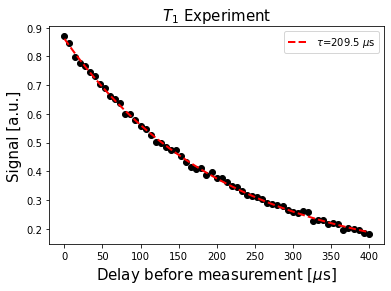

In [61]:
import matplotlib.pyplot as plt

qubit_decay_results = job_qubit_decay.result(timeout=120)

qubit_decay_values = []
for i in range(len(T1_delay_times)):
    counts=qubit_decay_results.get_counts(i)
    qubit_decay_values.append(counts['1']/sum(counts.values()))
#qubit_decay_values = np.real(qubit_decay_values)
#qubit_decay_values/=max(qubit_decay_values)

decay_popt,_=fit_exponential(T1_delay_times, qubit_decay_values)
T1=decay_popt[0]

plt.scatter(T1_delay_times*1e6, qubit_decay_values, color='black') 
plt.plot(T1_delay_times*1e6,exponential(T1_delay_times,*decay_popt),'--',lw=2,color='red',label=r'$\tau$={:.1f} $\mu$s'.format(T1*1e6))
plt.title("$T_1$ Experiment", fontsize=15)
plt.xlabel('Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Signal [a.u.]', fontsize=15)
plt.legend()
plt.show()

In [58]:
decay_popt

array([2.09485801e-04, 9.08143148e-01, 8.16069270e-02])

In [116]:
backend.job_limit().maximum_jobs

In [56]:
import qutip as qt

result=mesolve(qt.qeye(2),qt.basis(2,1),T1_delay_times,c_ops=[1/np.sqrt(T1)*qt.sigmap()], e_ops=[qt.num(2)])

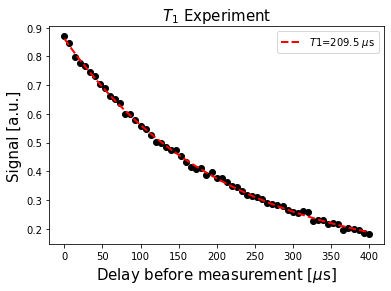

In [63]:
a=decay_popt[1]
c=decay_popt[2]
plt.scatter(T1_delay_times*1e6, qubit_decay_values, color='black') 
plt.plot(T1_delay_times*1e6,a*result.expect[0]+c,'--',lw=2,color='red',label=r'$T1$={:.1f} $\mu$s'.format(T1*1e6))
#plt.plot(T1_delay_times*1e6,result.expect[0],'--',lw=2,color='red',label=r'$T1$={:.1f} $\mu$s'.format(T1*1e6))
plt.title("$T_1$ Experiment", fontsize=15)
plt.xlabel('Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Signal [a.u.]', fontsize=15)
plt.legend()
plt.show()

In [119]:
drive_detuning=50e3
drive_freq=backend_defaults.qubit_freq_est[0] +  drive_detuning

qubit_ramsey_pulses = []

T2_delay_times=np.linspace(0,100e-6,51) #measurement time delays

for delay in T2_delay_times:
    with pulse.build(name=f"decay delay = {delay * 1e6} us") as temp_decay_pulse:
        with pulse.align_sequential():
            pulse.play(pi_2_pulse, drive_chan)
            pulse.delay(int((delay)//dt), meas_chan)
            pulse.play(pi_2_pulse, drive_chan)
            pulse.call(measure)  
    qubit_ramsey_pulses.append(temp_decay_pulse)

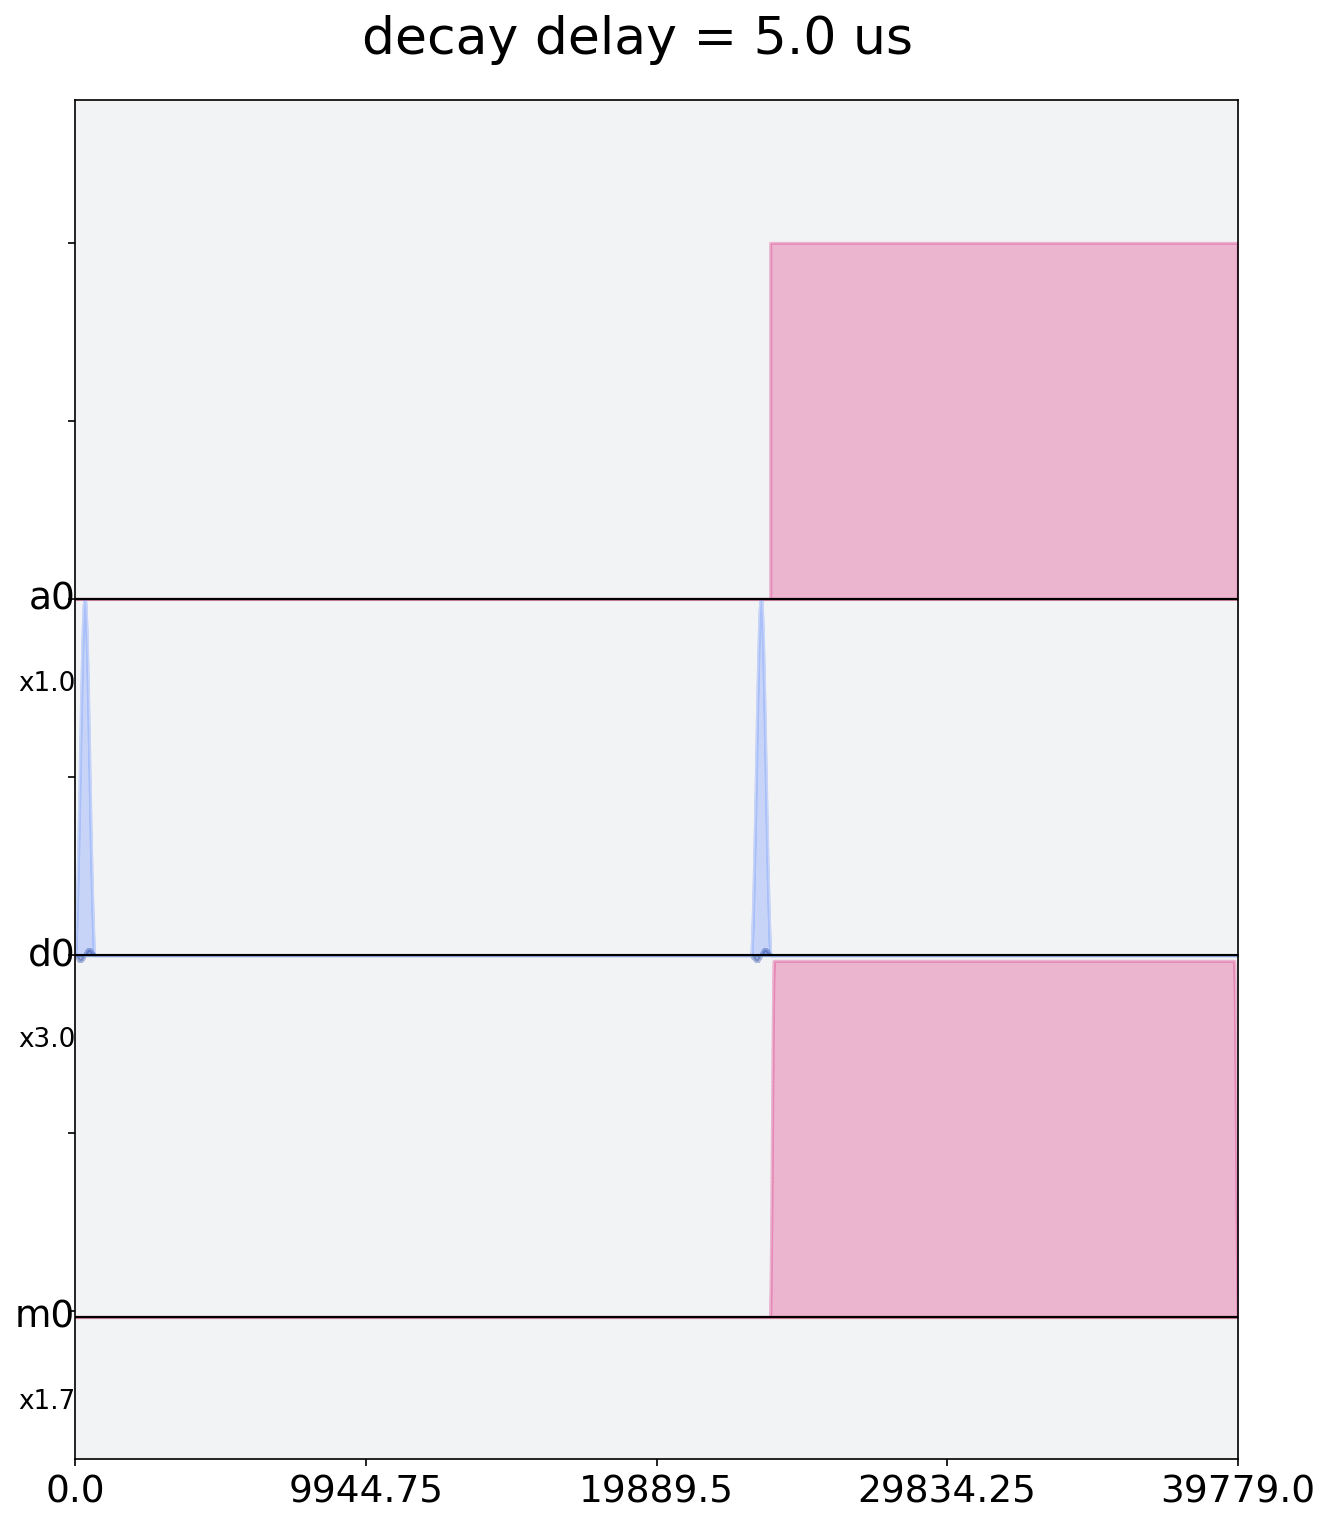

In [34]:
qubit_ramsey_pulses[1].draw()

In [122]:
los = [{drive_chan: drive_freq}]

num_shots = 1024

qubit_ramsey_experiment = assemble(qubit_ramsey_pulses,
                         backend=backend, 
                         meas_level=2,
                         meas_return='avg',
                         shots=num_shots,
                         schedule_los= los * len(qubit_ramsey_pulses))

job_qubit_ramsey = backend.run(qubit_ramsey_experiment)
job_monitor(job_qubit_ramsey)

C:\Users\karam\Anaconda3\lib\site-packages\qiskit\compiler\assemble.py:323: RuntimeWarning: Dynamic rep rates not supported on this backend. rep_time will be used instead of rep_delay.
  RuntimeWarning,


Job Status: job is actively running

Job Status: job has successfully run


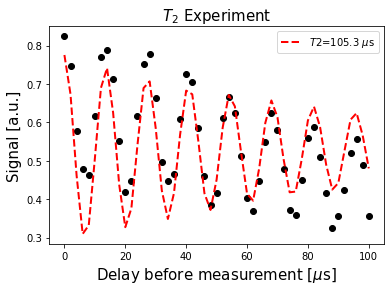

In [123]:
import matplotlib.pyplot as plt

qubit_ramsey_results = job_qubit_ramsey.result(timeout=120)

qubit_ramsey_values = []
for i in range(len(T2_delay_times)):
    counts=qubit_ramsey_results.get_counts(i)
    qubit_ramsey_values.append(counts['1']/sum(counts.values()))
    #qubit_ramsey_values.append(qubit_ramsey_results.get_memory(i)[0])
#qubit_ramsey_values = np.real(qubit_ramsey_values)
#qubit_ramsey_values = (qubit_ramsey_values-min(qubit_ramsey_values))
#qubit_ramsey_values/=max(qubit_ramsey_values)

ramsey_popt,_=fit_damped_sine(T2_delay_times[5:], qubit_ramsey_values[5:])
T2=ramsey_popt[1]
omega=2*np.pi*ramsey_popt[0]
a=ramsey_popt[2]
c=ramsey_popt[3]

#p0=[5e4,50e-6,.5,.5,3*np.pi/2]

plt.scatter(T2_delay_times*1e6, qubit_ramsey_values, color='black') 
plt.plot(T2_delay_times*1e6,damped_sine(T2_delay_times,*ramsey_popt),'--',lw=2,color='red',label=r'$T2$={:.1f} $\mu$s'.format(T2*1e6))
#plt.plot(T2_delay_times*1e6,damped_sine(T2_delay_times,*p0),'--',lw=2,color='red',label=r'$\tau$={:.1f} $\mu$s'.format(T1*1e6))
plt.title("$T_2$ Experiment", fontsize=15)
plt.xlabel('Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Signal [a.u.]', fontsize=15)
plt.legend()
plt.show()

In [86]:
ramsey_popt

array([3.58335255e+04, 3.63794089e-05, 5.26747662e-01, 4.89331160e-01,
       7.93697773e+00])

In [110]:
result_ramsey=mesolve(omega/2*qt.sigmaz(),(qt.basis(2,1)+qt.basis(2,0)).unit(),T2_delay_times,c_ops=[1/np.sqrt(T2)*qt.sigmaz()], e_ops=[(1+qt.sigmax())/2])

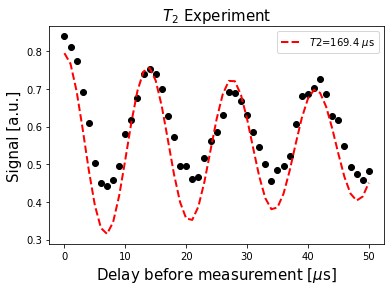

In [114]:
plt.scatter(T2_delay_times*1e6, qubit_ramsey_values, color='black') 
plt.plot(T2_delay_times*1e6,(result_ramsey.expect[0]+c)/2,'--',lw=2,color='red',label=r'$T2$={:.1f} $\mu$s'.format(T2*1e6))
plt.title("$T_2$ Experiment", fontsize=15)
plt.xlabel('Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Signal [a.u.]', fontsize=15)
plt.legend()
plt.show()